In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from sklearn.metrics import pairwise_distances
import requests
import pickle
from datetime import datetime
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [4]:
fashion_df = pd.read_csv('./data/fashion.csv')
fashion_df.head(20)

,ProductId,Gender,Category,SubCategory,ProductType,Colour,Usage,ProductTitle,Image,ImageURL
0,42419,Girls,Apparel,Topwear,Tops,White,Casual,Gini and Jony Girls Knit White Top,42419.jpg,http://assets.myntassets.com/v1/images/style/p...
1,34009,Girls,Apparel,Topwear,Tops,Black,Casual,Gini and Jony Girls Black Top,34009.jpg,http://assets.myntassets.com/v1/images/style/p...
2,40143,Girls,Apparel,Topwear,Tops,Blue,Casual,Gini and Jony Girls Pretty Blossom Blue Top,40143.jpg,http://assets.myntassets.com/v1/images/style/p...
3,23623,Girls,Apparel,Topwear,Tops,Pink,Casual,Doodle Kids Girls Pink I love Shopping Top,23623.jpg,http://assets.myntassets.com/v1/images/style/p...
4,47154,Girls,Apparel,Bottomwear,Capris,Black,Casual,Gini and Jony Girls Black Capris,47154.jpg,http://assets.myntassets.com/v1/images/style/p...
5,25520,Girls,Apparel,Topwear,Tops,White,Casual,Doodle Kids Girls City Chic White Top,25520.jpg,http://assets.myntassets.com/v1/images/style/p...
6,31120,Girls,Apparel,Topwear,Tops,Pink,Casual,Palm Tree Girls Pink Top,31120.jpg,http://assets.myntassets.com/v1/images/style/p...
7,31118,Girls,Apparel,Topwear,Tops,Red,Casual,Gini and Jony Girls Red Top,31118.jpg,http://assets.myntassets.com/v1/images/style/p...
8,54923,Girls,Apparel,Bottomwear,Capris,Olive,Casual,Do u speak Green Girls Olive 3/4 Pant,54923.jpg,http://assets.myntassets.com/v1/images/style/p...
9,31127,Girls,Apparel,Dress,Dresses,Black,Casual,Gini and Jony Girls Black Dress,31127.jpg,http://assets.myntassets.com/v1/images/style/p...


In [5]:
fashion_df["Gender"].value_counts()

Men      811
Women    769
Boys     759
Girls    567
Name: Gender, dtype: int64

In [6]:
footwear_men = fashion_df[fashion_df["Gender"]=="Men"]

footwear_men = footwear_men.head(100)

footwear_men["Gender"].value_counts()

Men    100
Name: Gender, dtype: int64

In [9]:
from tensorflow.python.keras.applications.resnet import ResNet50

img_width, img_height = 224, 224

#top_model_weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
train_data_dir = "./"

nb_train_samples = 811
epochs = 50
batch_size = 1

def extract_features():
    Itemcodes = []
    datagen = ImageDataGenerator(rescale=1. / 255)
    model = ResNet50(include_top=False, weights='imagenet')
    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    for i in generator.filenames:
        print("round:", i)
        Itemcodes.append(i[(i.find("/")+1):i.find(".")])
    extracted_features = model.predict(generator, nb_train_samples // batch_size)
    extracted_features = extracted_features.reshape((811, 100352))
    
    np.save(open('./Men_ResNet_features.npy', 'wb'), extracted_features)
    np.save(open('./Men_ResNet_feature_product_ids.npy', 'wb'), np.array(Itemcodes))
    
a = datetime.now()
extract_features()
print("Time taken in feature extraction", datetime.now()-a)

Found 861 images belonging to 7 classes.
round: fashion_images/10037.jpg
round: fashion_images/10039.jpg
round: fashion_images/10097.jpg
round: fashion_images/10174.jpg
round: fashion_images/10180.jpg
round: fashion_images/10266.jpg
round: fashion_images/10267.jpg
round: fashion_images/10268.jpg
round: fashion_images/10293.jpg
round: fashion_images/10294.jpg
round: fashion_images/10295.jpg
round: fashion_images/10632.jpg
round: fashion_images/10633.jpg
round: fashion_images/10634.jpg
round: fashion_images/10635.jpg
round: fashion_images/11851.jpg
round: fashion_images/11856.jpg
round: fashion_images/11912.jpg
round: fashion_images/11913.jpg
round: fashion_images/11914.jpg
round: fashion_images/11915.jpg
round: fashion_images/11922.jpg
round: fashion_images/11923.jpg
round: fashion_images/11924.jpg
round: fashion_images/11940.jpg
round: fashion_images/11941.jpg
round: fashion_images/11946.jpg
round: fashion_images/11947.jpg
round: fashion_images/11948.jpg
round: fashion_images/11949.jpg

2021-09-07 11:07:38.204167: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-07 11:07:38.205672: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-09-07 11:07:38.412011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


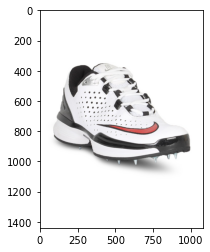

In [7]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
  
# Read Images
img = mpimg.imread('./fashion_images/1636.jpg')
  
# Output Images
plt.imshow(img)